# A 

<strong>URL do conjunto de dados</strong> - https://drive.google.com/drive/folders/1hhtWq0-XI1Q6YHrX4S5QRS09je8IDfdA 

<strong>Fundamentação da escolha do tema</strong> - O nosso trabalho trata-se de uma lista dos 30 vídeos de música mais ouvidos, no Youtube, até hoje. O Youtube é uma plataforma de compartilhamento de vídeo criada em 2005 e posteriormente comprada pela Google em 2006. Para além do site principal, existe também em forma de aplicação para Android e iOS, inclui desde videoclips, notícias, comentários, filmes e muito mais. Em 2015 foi lançado o "Youtube Music", que veio concentrar a música existente na plataforma num só sítio. O Youtube é uma das plataformas mais usadas para ouvir música, mesmo com o aparecimento das plataformas de streaming tais como o Spotify e Apple Music, devido ao seu impacto social na cultura popular e na criação de tendências da internet. 
Decidimos realizar esta base de dados visto que a música, bem como o vídeo, são temas do nosso interesse. Ao realizar a pesquisa conseguimos concluir que existem determinados géneros, assim como artistas, que têm mais afluência no mercado. 
Devido à falta de um ficheiro csv já existente que contivesse toda a informação necessária, criámos um nós. A pesquisa para realizar este ficheiro foi feita através de informação encontrada no próprio Youtube, assim como em locais como a Wikipédia e o Google (ficheiro com os links em anexo), que são fontes maioritariamente confiáveis. Os campos mais relevantes para o objetivo deste projeto são: os nomes das músicas, em seguimento das suas visualizações, que lhes garantem um lugar nesta tabela. Nenhum dos dados fornecidos é descartável, pois todos são necessários para uma análise mais correta.

<strong>Perguntas que vão ser respondidas:</strong> 

<strong>1 -</strong> Qual o género musical mais popular?

<strong>2 -</strong> Qual o vídeo com mais visualizações?

<strong>3 -</strong> Qual o vídeo com menos visualizações?

<strong>4 -</strong> Qual foi o ano dominante?

<strong>5 -</strong> Qual foi o artista dominante?

<strong>6 -</strong> Qual foi a diferença entre o vídeo no primeiro lugar e o vídeo no último lugar?

<strong>7 -</strong> Quantas views tem a música "Baby"? 


In [13]:
# Import the modules we need to use for thedataset
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# Import the csv data file
top30_df = pd.read_csv("top30.csv", encoding='latin-1', index_col=0)

In [15]:
# Inspect the csv data
print(top30_df.shape)
print(top30_df.index.is_unique)
print(top30_df.columns.is_unique)
print(top30_df[top30_df.duplicated() == True])
top30_df.head()

(30, 6)
True
True
Empty DataFrame
Columns: [NAME, ARTIST, VIEWS, YEAR, GENRE, YOUTUBE.URL]
Index: []


,NAME,ARTIST,VIEWS,YEAR,GENRE,YOUTUBE.URL
NUMBER,,,,,,
1,Despacito,"Luis Fonsi, Daddy Yankee","7,86",2017,"Latin Pop, Reggaeton",(2) Luis Fonsi - Despacito ft. Daddy Yankee - ...
2,Shape Of You,Ed Sheeran,"5,73",2017,Pop,(2) Ed Sheeran - Shape of You (Official Music ...
3,See You Again,"Charlie Puth, Wiz Khalifa","5,52",2015,Pop,(2) Wiz Khalifa - See You Again ft. Charlie Pu...
4,Uptown Funk,"Mark Ronson, Bruno Mars","4,58",2014,"Funk, Boogie, Pop",(2) Mark Ronson - Uptown Funk (Official Video)...
5,Gangnam Style,PSY,"4,43",2012,K-Pop,(2) PSY - GANGNAM STYLE(ê°ë¨ì¤íì¼) M/V -...


In [16]:
# Remove columns that we do not need for analysis
top30_df = top30_df.drop(
    ['YOUTUBE.URL'],
    axis=1
)

# Rename the columns that we need to use for analysis
top30_df = top30_df.rename(
    columns = {
        'NUMBER': 'nr', 'NAME': 'nm', 'ARTIST': 'art', 'VIEWS': 'vws', 'YEAR': 'yr', 'GENRE': 'gnr'
        }
)

print(top30_df.describe())
top30_df.info()

                yr
count    30.000000
mean   2014.200000
std       2.631376
min    2007.000000
25%    2013.250000
50%    2014.500000
75%    2016.000000
max    2018.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nm      30 non-null     object
 1   art     29 non-null     object
 2   vws     30 non-null     object
 3   yr      30 non-null     int64 
 4   gnr     30 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [5]:
print(top30_df.isna())

           nm    art    vws     yr    gnr
NUMBER                                   
1       False  False  False  False  False
2       False  False  False  False  False
3       False  False  False  False  False
4       False  False  False  False  False
5       False  False  False  False  False
6       False  False  False  False  False
7       False  False  False  False  False
8       False  False  False  False  False
9       False  False  False  False  False
10      False  False  False  False  False
11      False  False  False  False  False
12      False  False  False  False  False
13      False  False  False  False  False
14      False  False  False  False  False
15      False  False  False  False  False
16      False  False  False  False  False
17      False  False  False  False  False
18      False  False  False  False  False
19      False  False  False  False  False
20      False  False  False  False  False
21      False  False  False  False  False
22      False  False  False  False

In [6]:
print(top30_df.mean())

yr    2014.2
dtype: float64


C:\Users\adria\AppData\Local\Temp/ipykernel_16708/2981347174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(top30_df.mean())


<strong>RESPOSTAS</strong>

<strong>1- Qual o género musical mais popular?</strong>

<AxesSubplot:title={'center':'Género Musical Mais Popular'}, ylabel='Genre'>

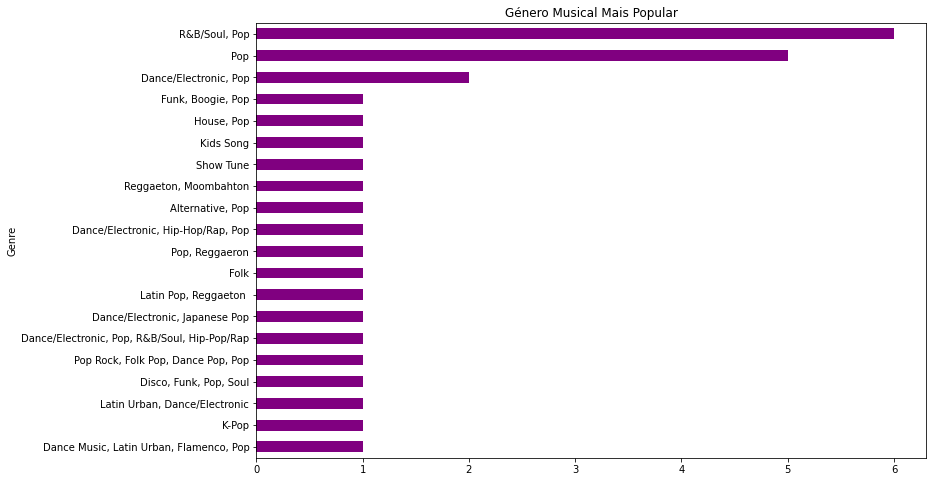

In [26]:
# Calculate the value counts of genre
df1 = top30_df['gnr'].value_counts()
df_sorted = df1.sort_values(ascending = True)

# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Género Musical Mais Popular',
    figsize = [12,8],
    ylabel = 'Genre',
    color = 'purple'
    )

<strong>Resposta:</strong>

Dentro de todas as músicas no Top 30, o género musical dominante é o R&B/Soul e Pop.

<strong>2 -Qual o vídeo com mais visualizações?</strong>

<AxesSubplot:title={'center':'Número de Views'}, ylabel='Views'>

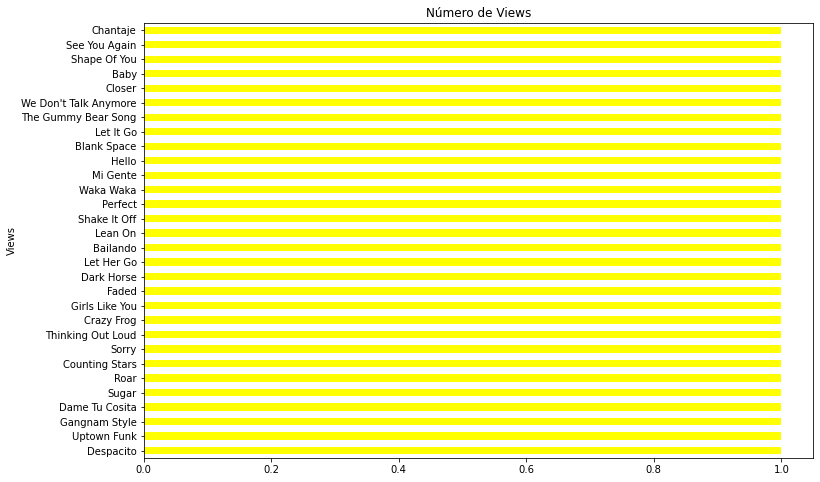

In [30]:
# Calculate the value counts of views
df1 = top30_df['nm'].value_counts()
df_sorted = df1.sort_values(ascending = True)


# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Número de Views',
    figsize = [12,8],
    ylabel = 'Views',
    color = 'yellow'
    )

<strong>Resposta:</strong>

O vídeo com mais visualizações é o vídeo da música "Despacito" de Luís Fonsi com o Daddy Yankee, com 7,86 mM de visualizações.

<strong>3 - Qual o vídeo com menos visualizações?</strong>

<AxesSubplot:title={'center':'Numero de Views'}, ylabel='Views'>

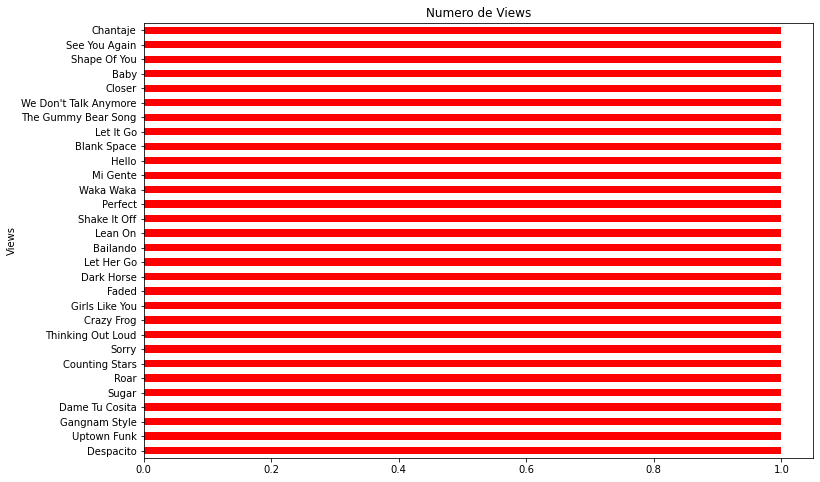

In [10]:
# Calculate the value counts of views
df1 = top30_df['nm'].value_counts()
df_sorted = df1.sort_values(ascending = True)


# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Numero de Views',
    figsize = [12,8],
    ylabel = 'Views',
    color = 'red'
    )

<strong>Resposta:</strong>

O vídeo com menos visualizações é o vídeo da música "Chantaje" da Shakira com o Maluma, com 2,73mM de visualizações.

<strong>4 - Qual foi o ano dominante?</strong>

<AxesSubplot:title={'center':'Ano Dominante'}, ylabel='Years'>

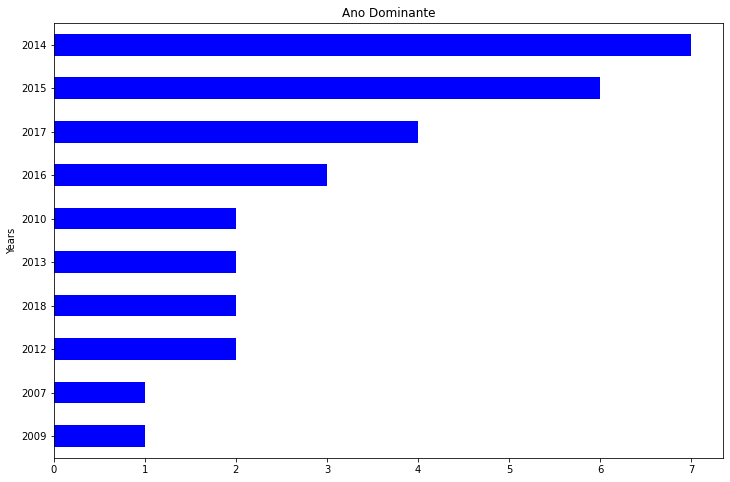

In [11]:
# Calculate the value counts of year
df1 = top30_df['yr'].value_counts()
df_sorted = df1.sort_values(ascending = True)

# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Ano Dominante',
    figsize = [12,8],
    ylabel = 'Years',
    color = 'blue'
    )

<strong>Resposta:</strong>

O ano de lançamento dominante entre o top 30 dos vídeos mais vistos é 2014.

<strong>5 - Qual foi o artista dominante?</strong>

<AxesSubplot:title={'center':'Artista Dominante'}, ylabel='Artists'>

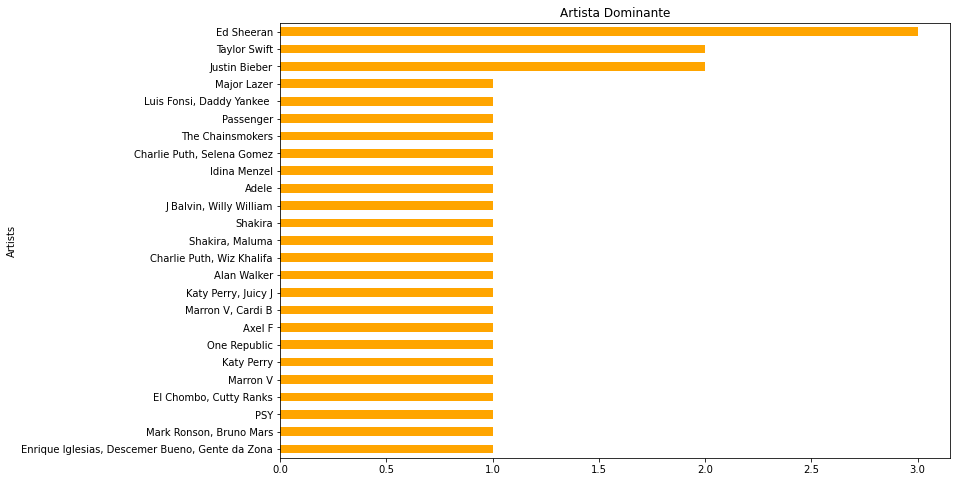

In [12]:
# Calculate the value counts of artist
df1 = top30_df['art'].value_counts()
df_sorted = df1.sort_values(ascending = True)

# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Artista Dominante',
    figsize = [12,8],
    ylabel = 'Artists',
    color = 'orange'
    )

<strong>Resposta:</strong>

O artista que domina o top 30 é o Ed Sheeran, com 3 músicas.

<strong>6 - Qual foi a diferença entre o vídeo no primeiro lugar e o vídeo no último lugar?</strong>

In [33]:
7.86 - 2.73

5.130000000000001

<strong>Resposta:</strong>

A diferença de visualizações entre o primeiro e o último lugar é de 5.13 mM.

<strong>7 - Quantas views tem a música "Baby"?</strong>

<AxesSubplot:title={'center':'Views da Música "Baby"'}, ylabel='Views'>

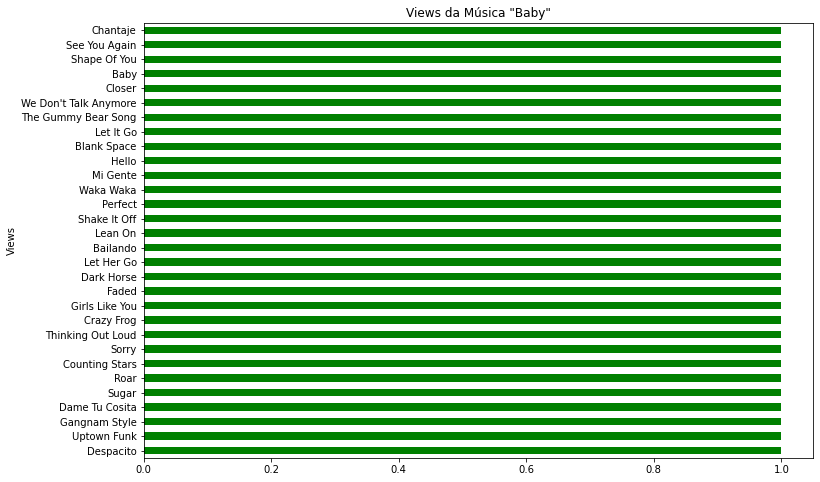

In [23]:
# Calculate the value counts of views
df1 = top30_df['nm'].value_counts()
df_sorted = df1.sort_values(ascending = True)


# Plot the horizontal bar graph
df_sorted.plot(
    kind = 'barh',
    title = 'Views da Música "Baby"',
    figsize = [12,8],
    ylabel = 'Views',
    color = 'green'
    )

<strong>Resposta:</strong>

A música "Baby" do Justin Bieber tem 2.75mM de visualizações.